<a href="https://colab.research.google.com/github/jayuambekar/Best-Flutter-UI-Templates/blob/master/NLP_FlipItNews_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objective

The objective of this project is to leverage  NLP   techniques to categorize news articles extracted from FlipItNews's internal database into predefined categories: politics, technology, sports, business, and entertainment. This will involve text preprocessing, feature extraction, and multi-class classification using machine learning models. The goal is to build and compare at least three different models to identify the most effective one for this task.

## Process

1. **Import Libraries and Load Dataset**
   - Install and import all necessary libraries.
   - Load the dataset containing news articles and their corresponding categories.

2. **Preliminary Analysis**
   - Analyze the structure of the dataset.
   - Explore the distribution of news articles across different categories.

3. **Text Preprocessing**
   - Create a user-defined function to preprocess the textual data:
     - Remove non-letter characters.
     - Remove stopwords.
     - Tokenize the text.
     - Perform lemmatization.
   - Display a sample news article before and after preprocessing.

4. **Encoding and Transforming Data**
   - Encode the target variable (categories) using Label/Ordinal encoder.
   - Implement options for vectorizing the data using Bag of Words and TF-IDF techniques.

5. **Train-Test Split**
   - Split the dataset into training and testing sets using a 75:25 ratio.

6. **Model Training and Evaluation**
   - Train a Naive Bayes classifier using the vectorized data.
   - Evaluate the model's performance and visualize results with a confusion matrix and classification report.
   - Functionalize the code to train and evaluate three additional classifier models: Decision Tree, Nearest Neighbors, and Random Forest.
   - Compare the performances of all models and identify the best performing one.


In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import gdown

# Download necessary NLTK data
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset from Google Drive
url = 'https://drive.google.com/uc?id=1I3-pQFzbSufhpMrUKAROBLGULXcWiB9u'
output = 'flipitnews_dataset.csv'
gdown.download(url, output, quiet=False)

data = pd.read_csv(output)

# Display the first few rows of the dataset
data.head()



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Downloading...
From: https://drive.google.com/uc?id=1I3-pQFzbSufhpMrUKAROBLGULXcWiB9u
To: /content/flipitnews_dataset.csv
100%|██████████| 5.06M/5.06M [00:00<00:00, 139MB/s]


,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...


### Preliminary Analysis

Shape of the dataset: (2225, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  2225 non-null   object
 1   Article   2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB
None
       Category                                            Article
count      2225                                               2225
unique        5                                               2126
top      Sports  kennedy questions trust of blair lib dem leade...
freq        511                                                  2
News articles per category:
 Category
Sports           511
Business         510
Politics         417
Technology       401
Entertainment    386
Name: count, dtype: int64


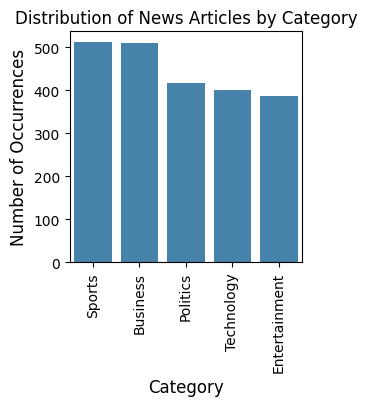

In [6]:
# Shape of the dataset
print("Shape of the dataset:", data.shape)

# information on dataset
print(data.info())

# Summary statistics
print(data.describe())

# Distribution of news articles per category
category_distribution = data['Category'].value_counts()
print("News articles per category:\n", category_distribution)

# Plotting the distribution
plt.figure(figsize=(3, 3))
sns.barplot(x=category_distribution.index, y=category_distribution.values, alpha=0.9)
plt.title('Distribution of News Articles by Category')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.xticks(rotation=90)
plt.show()

### Text Processing

In [7]:
# Function to preprocess text data
def preprocess_text(text):
    # Remove non-letters
    text = re.sub("[^a-zA-Z]", " ", text)

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.lower() not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Join words back into a single string
    return " ".join(words)

# Apply preprocessing to the dataset
data['Processed_Article'] = data['Article'].apply(preprocess_text)

# Display a sample article before and after preprocessing
print("Original Article:\n", data['Article'][0])
print("\nProcessed Article:\n", data['Processed_Article'][0])


Original Article:
 tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also bein

### Encoding and Transforming Data

In [8]:
print(data.columns)

Index(['Category', 'Article', 'Processed_Article'], dtype='object')


In [9]:
# Encode the target variable
label_encoder = LabelEncoder()
data['Category'] = label_encoder.fit_transform(data['Category'])

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Initialize a dictionary to store results
results = {}

# Choose between Bag of Words and TF-IDF
for vectorization_method in ['bow', 'tfidf']:
    if vectorization_method == 'tfidf':
        vectorizer = TfidfVectorizer(max_features=5000)
    else:
        vectorizer = CountVectorizer(max_features=5000)

    # Vectorize the data
    X = vectorizer.fit_transform(data['Article']).toarray()
    y = data['Category']

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Print shapes of train and test sets
    print(f"\nShape of train & test datasets after performing a 75:25 split with {vectorization_method.upper()}:")
    print(X_train.shape)
    print(X_test.shape)
    print(y_train.shape)
    print(y_test.shape)

    # Evaluate classifiers
    print(f"\nEvaluating models with {vectorization_method.upper()}:\n")

    # Naive Bayes Classifier
    nb_model = MultinomialNB()
    results[f'Naive Bayes ({vectorization_method.upper()})'] = evaluate_model(nb_model, X_train, X_test, y_train, y_test)

    # Decision Tree Classifier
    dt_model = DecisionTreeClassifier(random_state=42)
    results[f'Decision Tree ({vectorization_method.upper()})'] = evaluate_model(dt_model, X_train, X_test, y_train, y_test)

    # Nearest Neighbors Classifier
    knn_model = KNeighborsClassifier()
    results[f'Nearest Neighbors ({vectorization_method.upper()})'] = evaluate_model(knn_model, X_train, X_test, y_train, y_test)

    # Random Forest Classifier
    rf_model = RandomForestClassifier(random_state=42)
    results[f'Random Forest ({vectorization_method.upper()})'] = evaluate_model(rf_model, X_train, X_test, y_train, y_test)

# Compare the accuracy of the models
print("\nAccuracy of the models:")
for model, accuracy in results.items():
    print(f"{model}: {accuracy:.4f}")


Shape of train & test datasets after performing a 75:25 split with BOW:
(1668, 5000)
(557, 5000)
(1668,)
(557,)

Evaluating models with BOW:


Shape of train & test datasets after performing a 75:25 split with TFIDF:
(1668, 5000)
(557, 5000)
(1668,)
(557,)

Evaluating models with TFIDF:


Accuracy of the models:
Naive Bayes (BOW): 0.9731
Decision Tree (BOW): 0.8061
Nearest Neighbors (BOW): 0.7181
Random Forest (BOW): 0.9443
Naive Bayes (TFIDF): 0.9695
Decision Tree (TFIDF): 0.7738
Nearest Neighbors (TFIDF): 0.9408
Random Forest (TFIDF): 0.9443


## **Questionnaire**

1. **How many news articles are present in the dataset that we have?**
   - There are 2,225 news articles in total.

2. **Most of the news articles are from _____ category.**
   - 511 articles are from the Sports category, which is maximum.

3. **Only ___ no. of articles belong to the ‘Technology’ category.**
   - There are 401 articles in the Technology category.

4. **What are Stop Words and why should they be removed from the text data?**
   - Stop words are common words like "and", "the", "is" that are often filtered out in NLP tasks because they occur frequently and don't contribute much to the meaning of the text.

5. **Explain the difference between Stemming and Lemmatization.**
   - Stemming reduces words to their root form (e.g., "running" to "run", changing the form/tense/verb), while lemmatization also considers the word's meaning and converts it to a valid base or dictionary form (e.g., "better" to "good", just like synonyms).

6. **Which of the techniques Bag of Words or TF-IDF is considered to be more efficient than the other?**
   - TF-IDF is generally considered more efficient than Bag of Words because it not only **counts** the occurrences of words but also measures their **importance** in the document.

7. **What’s the shape of train & test data sets after performing a 75:25 split?**
   - After performing a 75:25 split on your dataset, the shapes of the train and test datasets are as follows:

    * X_train: (1668, 5000)

    * X_test: (557, 5000)

    * y_train: (1668,)

    * y_test: (557,)
    
  - This means:

      * There are 1,668 samples in the training set (X_train), with each sample represented by 5,000 features.

      * There are 557 samples in the test set (X_test), with each sample also represented by 5,000 features.

      * y_train contains 1,668 labels corresponding to the training samples.

      * y_test contains 557 labels corresponding to the test samples.

8. **Which of the following is found to be the best performing model:**
   - Based on the accuracy results, Naive Bayes with TF-IDF (accuracy of 96.95%) is the best performing model among those tested.

9. **According to this particular use case, both precision and recall are equally important. (T/F)**
  
  **True**, how -->

  - **Precision:** This measures how accurate our model is when it predicts a category. In this case, it's important because we want to ensure that when our model predicts a category like "Sports," it's correct.

  - **Recall:** This measures how well our model can find all the relevant articles of a particular category, such as correctly identifying all the "Sports" articles.

  - Since,we want our model to accurately classify news articles into their correct categories (precision) while also ensuring that it doesn't miss any important articles that belong to a category (recall).
  - Therefore, both precision and recall are crucial in this context
---